### Bag-of-Words

In [19]:
!pip install gensim

In [20]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [21]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [22]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [23]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [24]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [25]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [26]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

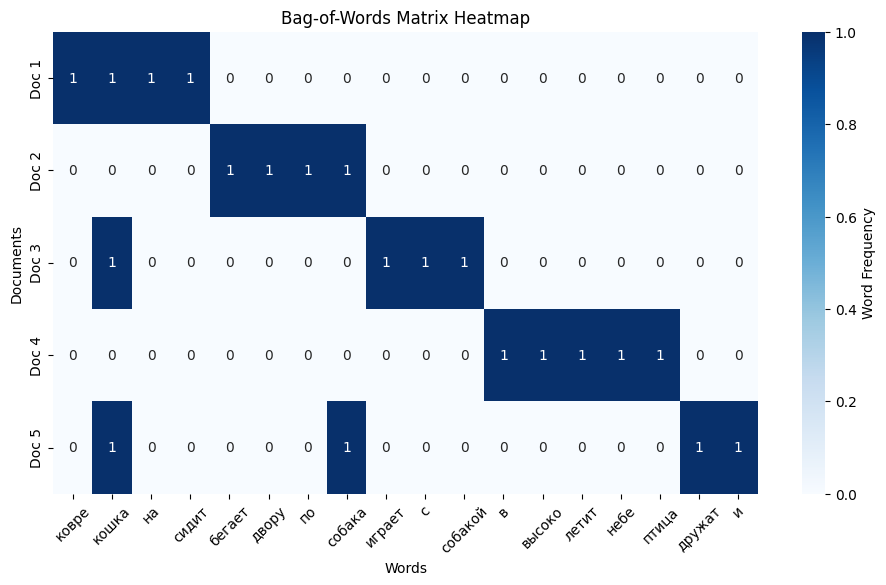

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [28]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.568)), ('кошка', np.float64(0.18)), ('на', np.float64(0.568)), ('сидит', np.float64(0.568))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


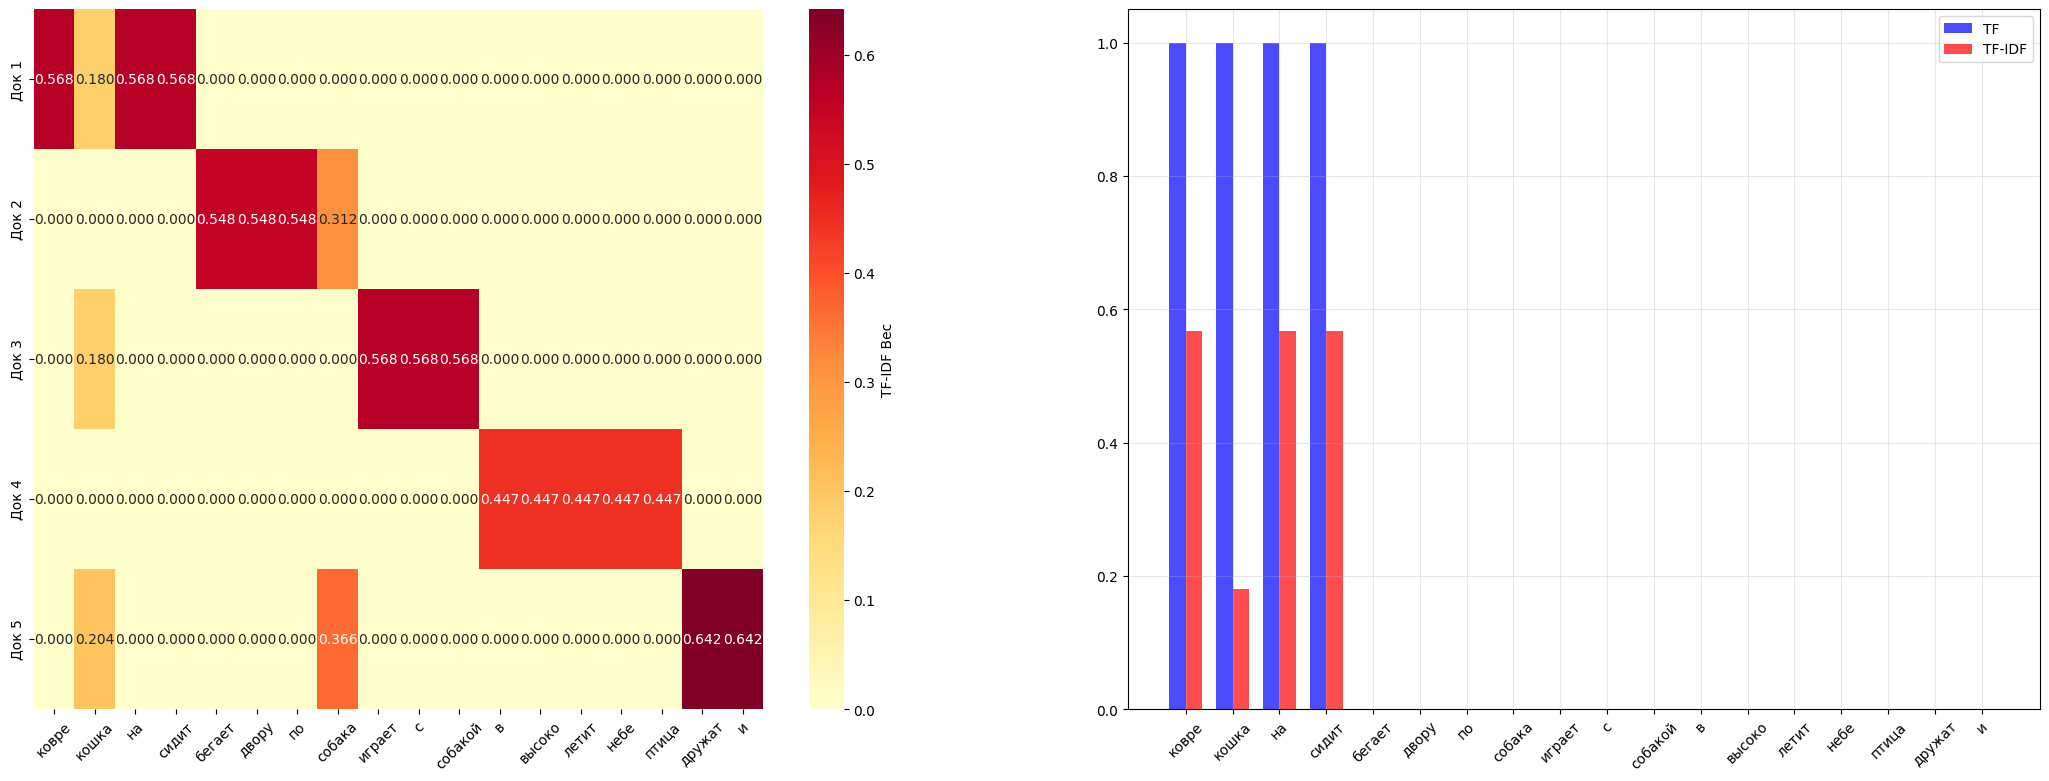

In [29]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [30]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...
[==================================================] 100.0% 66.0/66.0MB downloaded

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3  

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [31]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 19:27:56--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.05s   

2025-11-07 19:27:56 (1.81 MB/s) - ‘test.csv.1’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [32]:
import pandas as pd

# Читаем CSV файл
df = pd.read_csv('test.csv')

# Сохраняем тексты в переменную
texts = df['text'].tolist()

# Проверяем результат
print(f"Загружено {len(texts)} текстов")
print("Первые 3 текста:")
for i, text in enumerate(texts[:3]):
    print(f"{i+1}: {text}")

Загружено 870 текстов
Первые 3 текста:
1: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman 
2: #latestnews 4 #newmexico #politics + #nativeamerican + #Israel + #Palestine  -  Protesting Rise Of Alt-Right At... 
3: @user You are a stand up guy and a Gentleman Vice President Pence 


3. Извлечь столбец с текстами (макс. балл == 1)

In [33]:
import pandas as pd

# Читаем CSV файл
df = pd.read_csv('test.csv')

# Извлекаем столбец с текстами
texts = df['text']

# Проверяем результат
print(f"Тип данных: {type(texts)}")
print(f"Количество текстов: {len(texts)}")
print(f"Первые 5 текстов:\n{texts.head()}")

Тип данных: <class 'pandas.core.series.Series'>
Количество текстов: 870
Первые 5 текстов:
0    Trying to have a conversation with my dad abou...
1    #latestnews 4 #newmexico #politics + #nativeam...
2    @user You are a stand up guy and a Gentleman V...
3    @user @user @user Looks like Flynn isn't too p...
4    perfect pussy clips #vanessa hudgens zac efron...
Name: text, dtype: object


4. Построить Bag-of-Words (макс. балл == 3)

Задача 1.1: Создание словаря и BoW представления
Размер словаря: 4028 слов
Создано 870 BoW векторов
Размер каждого вектора: 4028

Задача 1.2: Визуализация результатов
Топ-20 самых частых слов в корпусе:
      word  frequency
30    user        570
11     the        387
1       to        268
3        a        227
27      of        199
10      is        186
75     for        176
119     in        165
36     and        164
67       i        135
198     on        118
31     you         92
285   this         80
272   that         79
271     it         79
5     with         71
32     are         65
179  trump         62
387     be         60
60     not         59


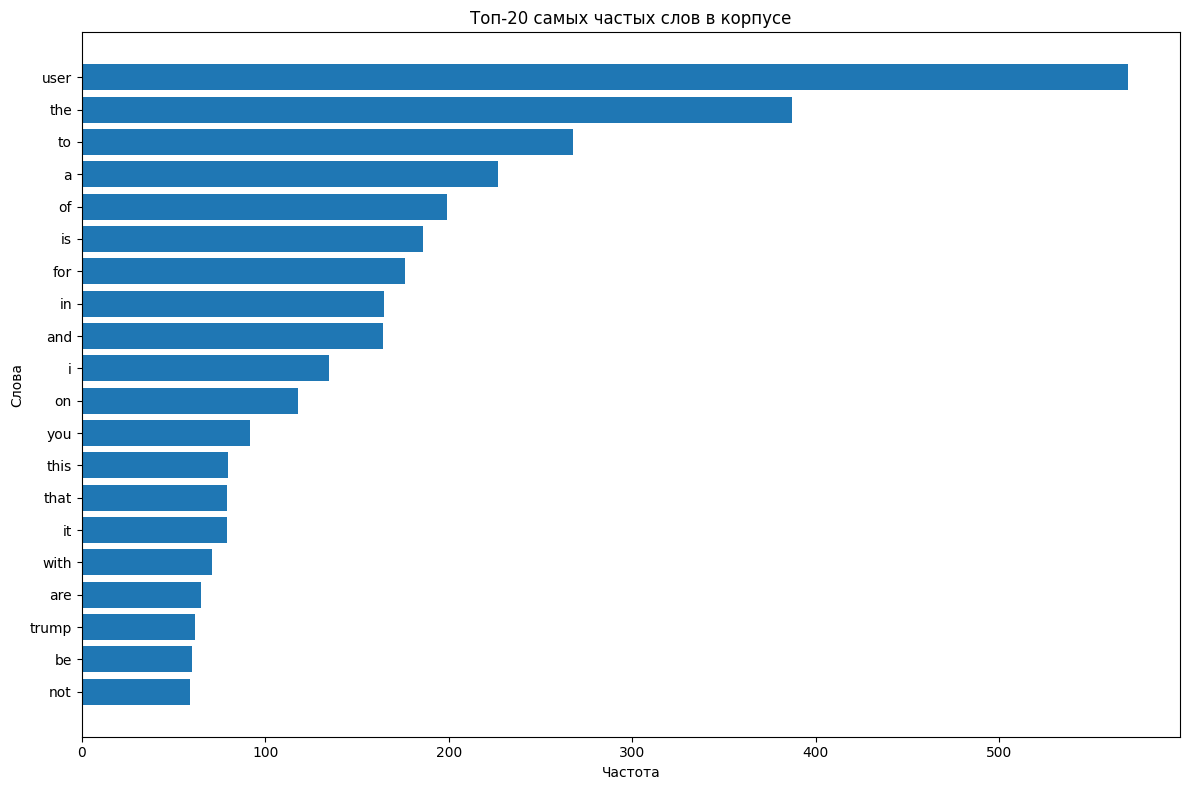

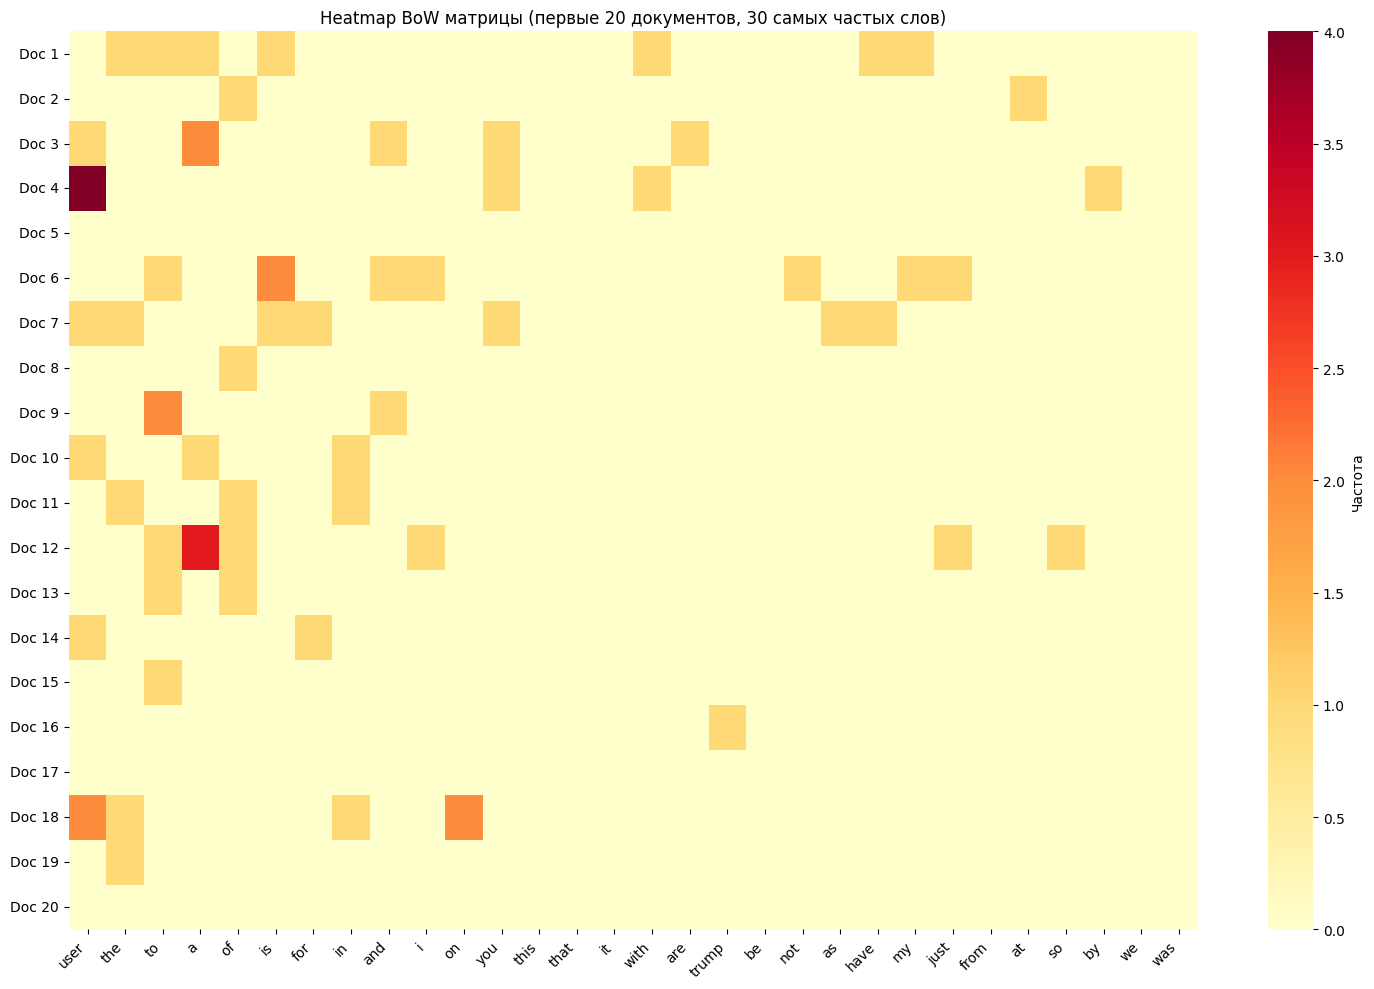


Общая статистика:
Всего документов: 870
Размер словаря: 4028
Общее количество слов в корпусе: 12855
Средняя длина документа: 14.8 слов
Самые частые слова: user, the, to, a, of, is, for, in, and, i


In [34]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
# - Удалите знаки препинания
# - Постройте словарь
# - Преобразуйте документы в BoW векторы

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
# - Постройте heatmap матрицы BoW
# - Найдите самые частые слова в корпусе

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Читаем CSV файл
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

print("Задача 1.1: Создание словаря и BoW представления")

# Предобработка текстов
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем знаки препинания (оставляем только буквы, цифры и пробелы)
    text = re.sub(r'[^\w\s]', '', text)
    # Удаляем лишние пробелы
    text = ' '.join(text.split())
    return text

# Обрабатываем все тексты
processed_texts = [preprocess_text(text) for text in texts]

# Создаем словарь
def build_vocabulary(texts):
    vocabulary = {}
    word_index = 0

    for text in texts:
        words = text.split()
        for word in words:
            if word not in vocabulary:
                vocabulary[word] = word_index
                word_index += 1

    return vocabulary

vocabulary = build_vocabulary(processed_texts)
print(f"Размер словаря: {len(vocabulary)} слов")

# Создаем BoW представление
def text_to_bow(text, vocabulary):
    bow_vector = [0] * len(vocabulary)
    words = text.split()

    for word in words:
        if word in vocabulary:
            bow_vector[vocabulary[word]] += 1

    return bow_vector

# Преобразуем все документы в BoW векторы
bow_vectors = [text_to_bow(text, vocabulary) for text in processed_texts]

print(f"Создано {len(bow_vectors)} BoW векторов")
print(f"Размер каждого вектора: {len(bow_vectors[0])}")

print("\nЗадача 1.2: Визуализация результатов")

# Создаем таблицу частот слов
def get_word_frequencies(bow_vectors, vocabulary):
    # Инвертируем словарь для получения слов по индексам
    index_to_word = {v: k for k, v in vocabulary.items()}

    # Считаем общие частоты слов
    total_frequencies = [0] * len(vocabulary)
    for bow in bow_vectors:
        for i, count in enumerate(bow):
            total_frequencies[i] += count

    # Создаем DataFrame с частотами
    freq_df = pd.DataFrame({
        'word': [index_to_word[i] for i in range(len(vocabulary))],
        'frequency': total_frequencies
    })

    return freq_df.sort_values('frequency', ascending=False)

# Получаем таблицу частот
freq_df = get_word_frequencies(bow_vectors, vocabulary)

print("Топ-20 самых частых слов в корпусе:")
print(freq_df.head(20))

# Визуализация: топ-20 самых частых слов
plt.figure(figsize=(12, 8))
top_words = freq_df.head(20)
plt.barh(top_words['word'], top_words['frequency'])
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Топ-20 самых частых слов в корпусе')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Heatmap матрицы BoW (первые 20 документов и 30 слов)
plt.figure(figsize=(15, 10))

# Выбираем первые 20 документов и 30 самых частых слов для визуализации
num_docs = min(20, len(bow_vectors))
num_words = min(30, len(vocabulary))

# Создаем подматрицу для heatmap
heatmap_data = np.array(bow_vectors[:num_docs])
# Берем только столбцы с самыми частыми словами
top_word_indices = freq_df.head(num_words).index
heatmap_data = heatmap_data[:, top_word_indices]
top_words_list = freq_df.head(num_words)['word'].tolist()

sns.heatmap(heatmap_data,
            xticklabels=top_words_list,
            yticklabels=[f"Doc {i+1}" for i in range(num_docs)],
            cmap='YlOrRd',
            cbar_kws={'label': 'Частота'})
plt.title('Heatmap BoW матрицы (первые 20 документов, 30 самых частых слов)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Дополнительная статистика
print(f"\nОбщая статистика:")
print(f"Всего документов: {len(texts)}")
print(f"Размер словаря: {len(vocabulary)}")
print(f"Общее количество слов в корпусе: {sum(freq_df['frequency'])}")
print(f"Средняя длина документа: {sum(freq_df['frequency']) / len(texts):.1f} слов")
print(f"Самые частые слова: {', '.join(freq_df.head(10)['word'].tolist())}")

5. Построить TF-IDF (макс. балл == 5)

Задача 2.1: Применение TF-IDF к BoW представлению
Размер словаря: 4028
Количество документов: 870
TF-IDF матрица создана: (870, 4028)

Задача 2.2: Анализ весов TF-IDF
Топ-20 слов с наибольшим средним TF-IDF:
      term  avg_tfidf  document_frequency       idf
38    user   0.602214               347.0  0.919168
12     the   0.481089               295.0  1.081518
14      to   0.413873               227.0  1.343543
0        a   0.395611               191.0  1.516220
25      of   0.360381               180.0  1.575536
8       is   0.358049               163.0  1.674743
80     for   0.352933               152.0  1.744613
30     and   0.335175               147.0  1.778061
116     in   0.334655               149.0  1.764547
67       i   0.315356               114.0  2.032295
199     on   0.282978               108.0  2.086362
40     you   0.253692                79.0  2.399045
273     it   0.228827                70.0  2.519998
276   that   0.223781                74.0  2.464428
290   this  

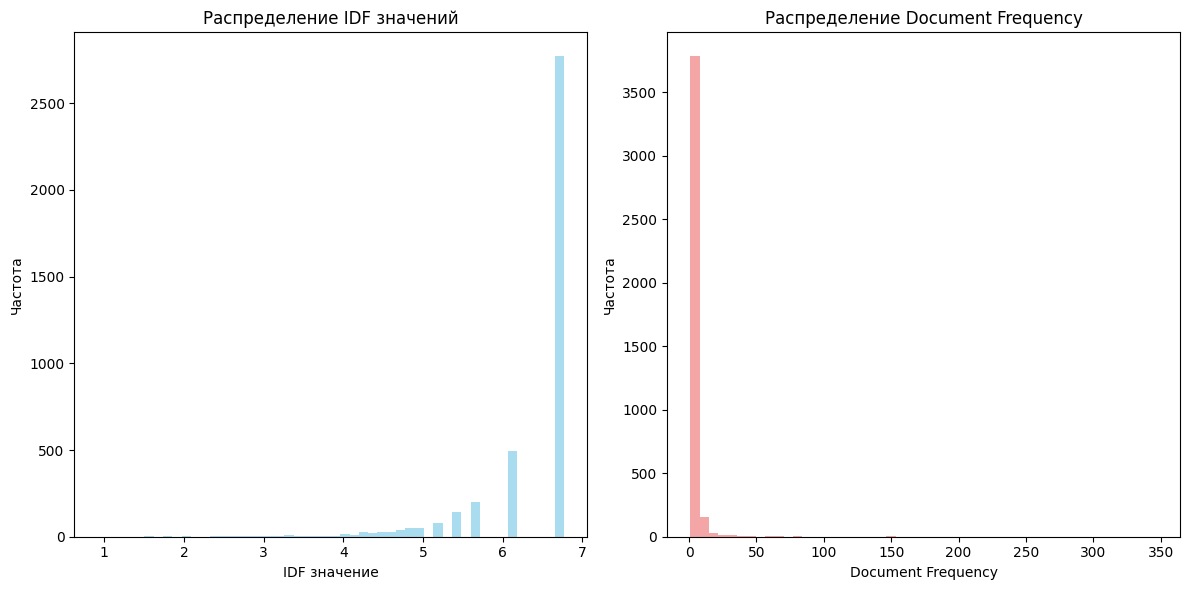


Слова с самыми высокими IDF (редкие, но значимые):
              term       idf  document_frequency
2          caveman  6.768493                 1.0
3     conversation  6.768493                 1.0
7      infuriating  6.768493                 1.0
11       pointless  6.768493                 1.0
22      latestnews  6.768493                 1.0
23  nativeamerican  6.768493                 1.0
24       newmexico  6.768493                 1.0
32       gentleman  6.768493                 1.0
39            vice  6.768493                 1.0
41         blocked  6.768493                 1.0

Слова с самыми низкими IDF (часто встречающиеся):
     term       idf  document_frequency
38   user  0.919168               347.0
12    the  1.081518               295.0
14     to  1.343543               227.0
0       a  1.516220               191.0
25     of  1.575536               180.0
8      is  1.674743               163.0
80    for  1.744613               152.0
116    in  1.764547               149.

In [35]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

import pandas as pd
import re
from collections import defaultdict
import numpy as np
from gensim import corpora, models
import math

# Читаем CSV файл
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

print("Задача 2.1: Применение TF-IDF к BoW представлению")

# Предобработка текстов
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    return text

processed_texts = [preprocess_text(text) for text in texts]

# Создаем токенизированные документы для gensim
tokenized_texts = [text.split() for text in processed_texts]

# Создаем словарь и корпус для gensim
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]

print(f"Размер словаря: {len(dictionary)}")
print(f"Количество документов: {len(corpus)}")

# Применяем TF-IDF модель
tfidf_model = models.TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]

# Преобразуем TF-IDF векторы в удобный формат
def tfidf_to_matrix(tfidf_corpus, num_terms):
    """Преобразует TF-IDF корпус в матрицу"""
    tfidf_matrix = np.zeros((len(tfidf_corpus), num_terms))

    for doc_idx, doc in enumerate(tfidf_corpus):
        for term_idx, tfidf_value in doc:
            tfidf_matrix[doc_idx, term_idx] = tfidf_value

    return tfidf_matrix

tfidf_matrix = tfidf_to_matrix(tfidf_corpus, len(dictionary))

print(f"TF-IDF матрица создана: {tfidf_matrix.shape}")

print("\nЗадача 2.2: Анализ весов TF-IDF")

# Вычисляем статистики вручную для анализа
def compute_tf_idf_stats(tokenized_texts, dictionary):
    """Вычисляет TF, DF, IDF и TF-IDF вручную"""
    num_docs = len(tokenized_texts)
    num_terms = len(dictionary)

    # TF матрица (term frequency)
    tf_matrix = np.zeros((num_docs, num_terms))

    # DF (document frequency)
    df_vector = np.zeros(num_terms)

    # Заполняем TF матрицу и считаем DF
    for doc_idx, doc in enumerate(tokenized_texts):
        doc_bow = dictionary.doc2bow(doc)
        for term_idx, tf in doc_bow:
            tf_matrix[doc_idx, term_idx] = tf
            df_vector[term_idx] += 1

    # Вычисляем IDF
    idf_vector = np.zeros(num_terms)
    for term_idx in range(num_terms):
        if df_vector[term_idx] > 0:
            idf_vector[term_idx] = math.log(num_docs / df_vector[term_idx])
        else:
            idf_vector[term_idx] = 0

    # Вычисляем TF-IDF
    tfidf_matrix_manual = np.zeros((num_docs, num_terms))
    for doc_idx in range(num_docs):
        for term_idx in range(num_terms):
            tfidf_matrix_manual[doc_idx, term_idx] = tf_matrix[doc_idx, term_idx] * idf_vector[term_idx]

    return tf_matrix, df_vector, idf_vector, tfidf_matrix_manual

# Вычисляем статистики
tf_matrix, df_vector, idf_vector, tfidf_manual = compute_tf_idf_stats(tokenized_texts, dictionary)

# Создаем детальную таблицу с анализом для каждого слова
analysis_data = []

for term_idx in range(len(dictionary)):
    term = dictionary[term_idx]

    # Средний TF по документам (где слово встречается)
    non_zero_tf = tf_matrix[:, term_idx][tf_matrix[:, term_idx] > 0]
    avg_tf = np.mean(non_zero_tf) if len(non_zero_tf) > 0 else 0

    # Максимальный TF
    max_tf = np.max(tf_matrix[:, term_idx])

    # Документ с максимальным TF
    max_tf_doc = np.argmax(tf_matrix[:, term_idx]) if max_tf > 0 else -1

    # Средний TF-IDF
    avg_tfidf = np.mean(tfidf_manual[:, term_idx])

    # Максимальный TF-IDF
    max_tfidf = np.max(tfidf_manual[:, term_idx])

    # Документ с максимальным TF-IDF
    max_tfidf_doc = np.argmax(tfidf_manual[:, term_idx]) if max_tfidf > 0 else -1

    analysis_data.append({
        'term': term,
        'term_id': term_idx,
        'document_frequency': df_vector[term_idx],
        'idf': idf_vector[term_idx],
        'avg_tf': avg_tf,
        'max_tf': max_tf,
        'max_tf_document': max_tf_doc,
        'avg_tfidf': avg_tfidf,
        'max_tfidf': max_tfidf,
        'max_tfidf_document': max_tfidf_doc
    })

# Создаем DataFrame с анализом
analysis_df = pd.DataFrame(analysis_data)

# Сортируем по TF-IDF для выявления наиболее значимых слов
analysis_df_sorted = analysis_df.sort_values('avg_tfidf', ascending=False)

print("Топ-20 слов с наибольшим средним TF-IDF:")
print(analysis_df_sorted[['term', 'avg_tfidf', 'document_frequency', 'idf']].head(20))

# Сохраняем результаты в CSV
output_filename = 'tfidf_analysis.csv'
analysis_df_sorted.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\nРезультаты сохранены в файл: {output_filename}")

# Дополнительный анализ: сравнение ручного расчета с gensim
print("\nСравнение ручного расчета TF-IDF с gensim:")
print(f"Средняя разница между ручным расчетом и gensim: {np.mean(np.abs(tfidf_manual - tfidf_matrix)):.6f}")

# Визуализация распределения IDF значений
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(idf_vector, bins=50, alpha=0.7, color='skyblue')
plt.xlabel('IDF значение')
plt.ylabel('Частота')
plt.title('Распределение IDF значений')

plt.subplot(1, 2, 2)
plt.hist(df_vector, bins=50, alpha=0.7, color='lightcoral')
plt.xlabel('Document Frequency')
plt.ylabel('Частота')
plt.title('Распределение Document Frequency')

plt.tight_layout()
plt.show()

# Анализ слов с самыми высокими и самыми низкими IDF
print("\nСлова с самыми высокими IDF (редкие, но значимые):")
high_idf_words = analysis_df.nlargest(10, 'idf')[['term', 'idf', 'document_frequency']]
print(high_idf_words)

print("\nСлова с самыми низкими IDF (часто встречающиеся):")
low_idf_words = analysis_df.nsmallest(10, 'idf')[['term', 'idf', 'document_frequency']]
print(low_idf_words)

# Статистика по корпусу
print(f"\nОбщая статистика TF-IDF:")
print(f"Всего уникальных слов: {len(dictionary)}")
print(f"Слова, встречающиеся только в 1 документе: {np.sum(df_vector == 1)}")
print(f"Слова, встречающиеся во всех документах: {np.sum(df_vector == len(texts))}")
print(f"Средний IDF по корпусу: {np.mean(idf_vector):.3f}")
print(f"Медианный IDF по корпусу: {np.median(idf_vector):.3f}")

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

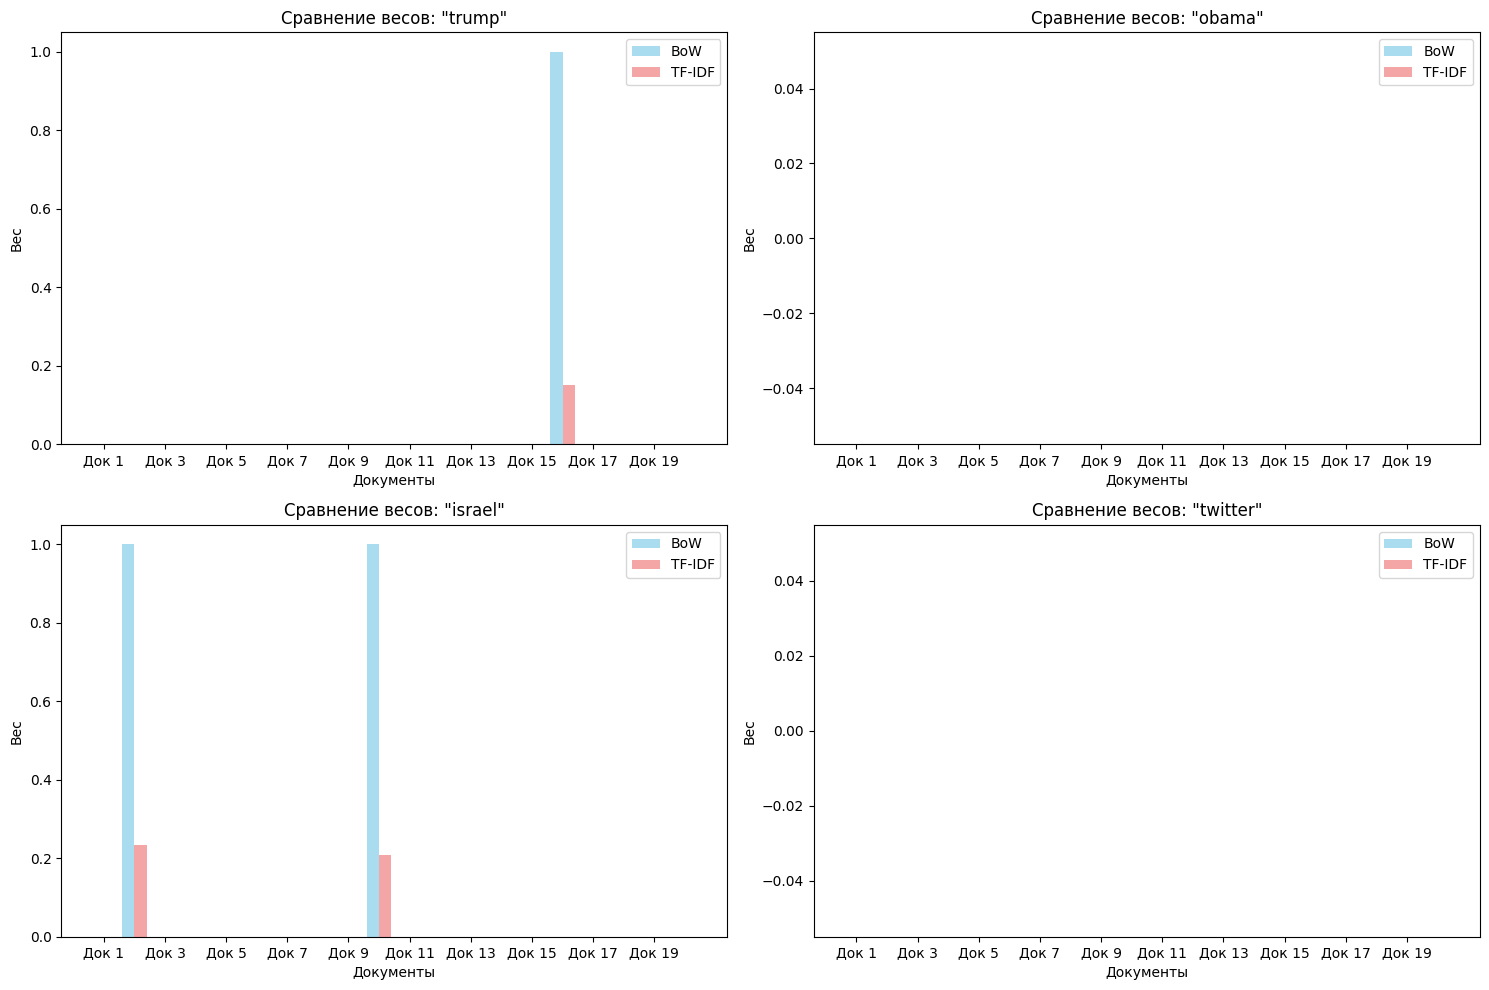

Статистика по выбранным словам:
--------------------------------------------------
Слово: 'trump'
  Document Frequency: 61
  Total Frequency: 62.0
  Max BoW weight: 2.0
  Max TF-IDF weight: 0.3522
  Средний TF-IDF: 0.0107
  Документ с макс. TF-IDF: #414
  Текст: @user trump cabinet is all white ...

Слово: 'obama'
  Document Frequency: 17
  Total Frequency: 18.0
  Max BoW weight: 2.0
  Max TF-IDF weight: 0.3451
  Средний TF-IDF: 0.0040
  Документ с макс. TF-IDF: #307
  Текст: The Frontiers Issue with Guest Editor President Barack Obama – President Barack ...

Слово: 'israel'
  Document Frequency: 12
  Total Frequency: 12.0
  Max BoW weight: 1.0
  Max TF-IDF weight: 0.3091
  Средний TF-IDF: 0.0033
  Документ с макс. TF-IDF: #146
  Текст: @user @user @user #Israel #Jerusalem SHABBAT SHALOM & BLESSINGS EVERYONE!!! ...

Слово: 'twitter'
  Document Frequency: 1
  Total Frequency: 1.0
  Max BoW weight: 1.0
  Max TF-IDF weight: 0.5758
  Средний TF-IDF: 0.0007
  Документ с макс. TF-IDF: #457
 

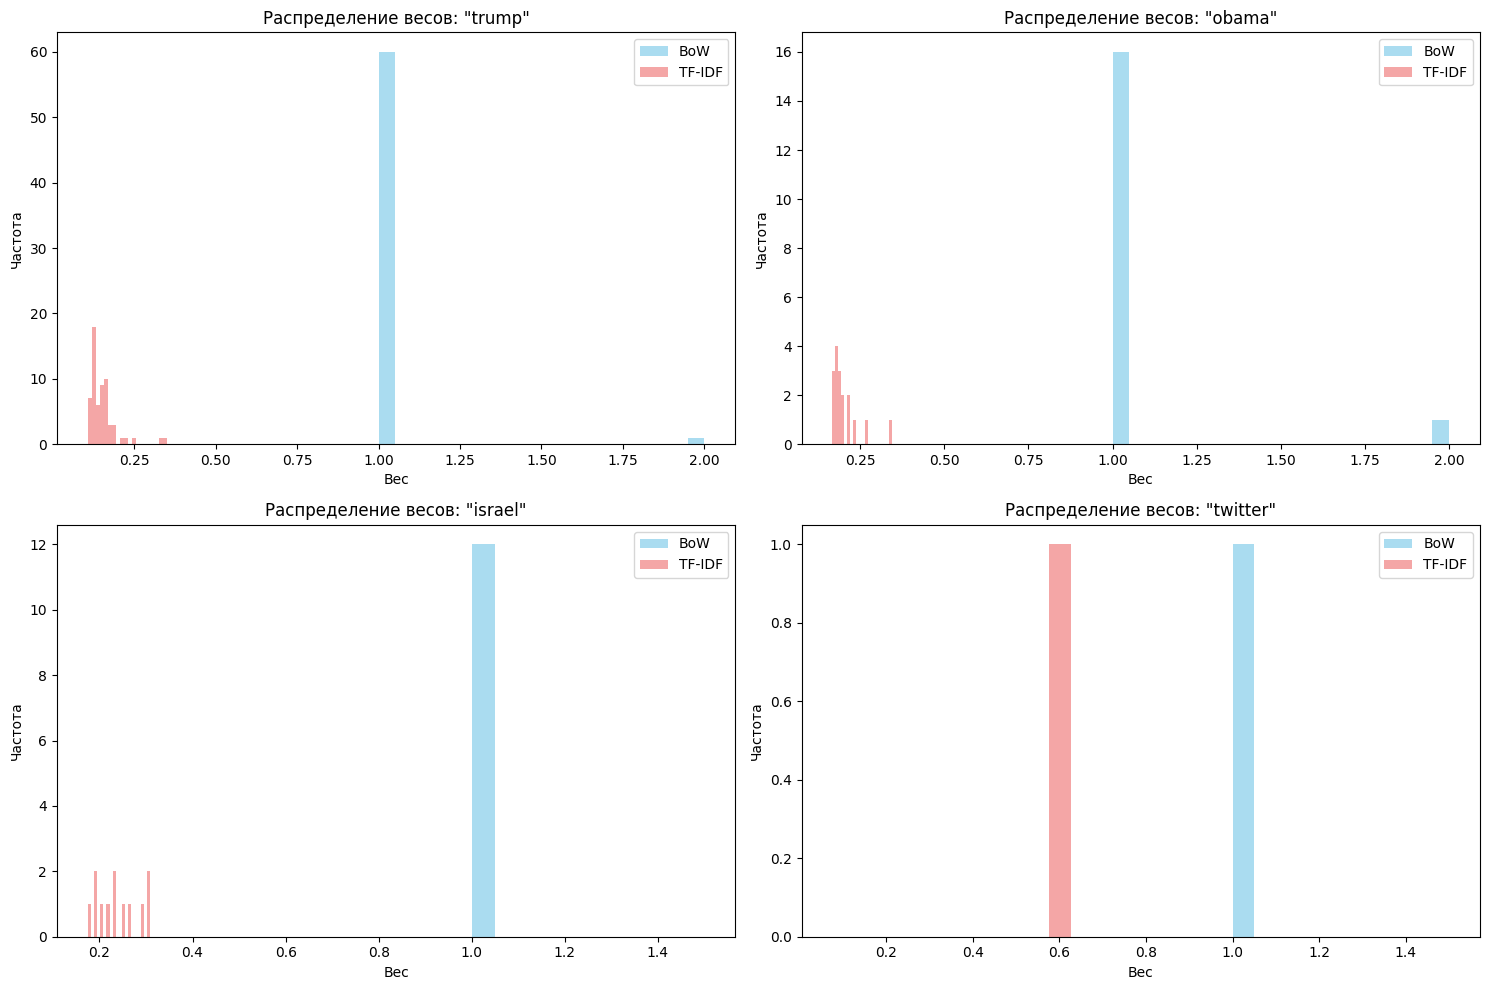

In [36]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models

# Читаем CSV файл
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# Предобработка текстов
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    return text

processed_texts = [preprocess_text(text) for text in texts]
tokenized_texts = [text.split() for text in processed_texts]

# Создаем словарь и корпус
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]

# Строим BoW представление (плотная матрица)
def build_bow_dense(corpus, num_terms):
    bow_dense = np.zeros((len(corpus), num_terms))
    for doc_idx, doc in enumerate(corpus):
        for term_idx, count in doc:
            bow_dense[doc_idx, term_idx] = count
    return bow_dense

bow_dense = build_bow_dense(corpus, len(dictionary))

# Строим TF-IDF представление (плотная матрица)
tfidf_model = models.TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]

def build_tfidf_dense(tfidf_corpus, num_terms):
    tfidf_dense = np.zeros((len(tfidf_corpus), num_terms))
    for doc_idx, doc in enumerate(tfidf_corpus):
        for term_idx, tfidf_value in doc:
            tfidf_dense[doc_idx, term_idx] = tfidf_value
    return tfidf_dense

tfidf_dense = build_tfidf_dense(tfidf_corpus, len(dictionary))

# Ваша функция для сравнения
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, word in enumerate(words):
        row, col = i // 2, i % 2

        # Проверяем, есть ли слово в словаре
        if word not in dictionary.token2id:
            print(f"Слово '{word}' не найдено в словаре")
            continue

        word_id = dictionary.token2id[word]

        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]

        # Ограничиваем количество документов для лучшей визуализации (первые 20)
        num_docs_to_show = min(20, len(bow_dense))
        x = range(num_docs_to_show)

        axes[row, col].bar(x, bow_weights[:num_docs_to_show], alpha=0.7, label='BoW', width=0.4, color='skyblue')
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights[:num_docs_to_show], alpha=0.7, label='TF-IDF', width=0.4, color='lightcoral')
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xlabel('Документы')
        axes[row, col].set_ylabel('Вес')

        # Устанавливаем подписи для каждого 5-го документа
        xtick_positions = range(0, num_docs_to_show, max(1, num_docs_to_show//10))
        axes[row, col].set_xticks([p + 0.2 for p in xtick_positions])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in xtick_positions])

    plt.tight_layout()
    plt.show()

# Выбираем слова для сравнения
selected_words = ['trump', 'obama', 'israel', 'twitter']

# Запускаем сравнение
compare_bow_tfidf(selected_words, bow_dense, tfidf_dense, dictionary)

# Дополнительная функция для статистики
def print_word_stats(words, bow_dense, tfidf_dense, dictionary, texts):
    print("Статистика по выбранным словам:")
    print("-" * 50)

    for word in words:
        if word not in dictionary.token2id:
            print(f"Слово '{word}' не найдено в словаре")
            continue

        word_id = dictionary.token2id[word]
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]

        # Статистика
        doc_freq = np.sum(np.array(bow_weights) > 0)
        total_freq = np.sum(bow_weights)
        max_bow = np.max(bow_weights)
        max_tfidf = np.max(tfidf_weights)

        print(f"Слово: '{word}'")
        print(f"  Document Frequency: {doc_freq}")
        print(f"  Total Frequency: {total_freq}")
        print(f"  Max BoW weight: {max_bow}")
        print(f"  Max TF-IDF weight: {max_tfidf:.4f}")
        print(f"  Средний TF-IDF: {np.mean(tfidf_weights):.4f}")

        # Показываем документ с максимальным TF-IDF
        if max_tfidf > 0:
            max_doc_idx = np.argmax(tfidf_weights)
            print(f"  Документ с макс. TF-IDF: #{max_doc_idx}")
            print(f"  Текст: {texts[max_doc_idx][:80]}...")
        print()

# Выводим статистику
print_word_stats(selected_words, bow_dense, tfidf_dense, dictionary, texts)

# Дополнительная визуализация: сравнение распределений весов
def plot_weight_distributions(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, word in enumerate(words):
        row, col = i // 2, i % 2

        if word not in dictionary.token2id:
            continue

        word_id = dictionary.token2id[word]
        bow_weights = np.array([doc[word_id] for doc in bow_dense])
        tfidf_weights = np.array([doc[word_id] for doc in tfidf_dense])

        # Только ненулевые веса
        non_zero_bow = bow_weights[bow_weights > 0]
        non_zero_tfidf = tfidf_weights[tfidf_weights > 0]

        if len(non_zero_bow) > 0:
            axes[row, col].hist(non_zero_bow, alpha=0.7, label='BoW', bins=20, color='skyblue')
            axes[row, col].hist(non_zero_tfidf, alpha=0.7, label='TF-IDF', bins=20, color='lightcoral')
            axes[row, col].set_title(f'Распределение весов: "{word}"')
            axes[row, col].legend()
            axes[row, col].set_xlabel('Вес')
            axes[row, col].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

# Строим распределения весов
plot_weight_distributions(selected_words, bow_dense, tfidf_dense, dictionary)

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```